In [12]:
from libdatasets import *
import librun
import libstop
from importlib import reload
from libadversarial import uncertainty_stop
from libstop import rank_stop_conds
from dotenv import load_dotenv; load_dotenv();

In [3]:
matrix = {
    # Dataset fetchers should cache if possible
    # Lambda wrapper required for function to be pickleable (sent to other threads via joblib)
    "datasets": [
        #("splice", wrap(splice, None)),
        ("anuran", wrap(anuran, None)),
        ("avila", wrap(avila, None)),
        ("covertype", wrap(covertype, None)),
        ("rcv1", wrap(rcv1, None)),
        ("sensorless", wrap(sensorless, None)),
        ("spamassassin", wrap(spamassassin, None)),
        ("splice", wrap(splice, None)),
        ("swarm", wrap(swarm, None)),
    ],
    "dataset_mutators": {
        "none": (lambda *x, **kwargs: x),
    },
    "methods": [
        ("uncertainty", partial(uncertainty_stop, n_instances=10)),
    ],
    "models": [
        "svm-linear"
    ],
    "meta": {
        "dataset_size": 1000,
        "labelled_size": 10,
        "test_size": 0.5,
        "n_runs": 10,
        "ret_classifiers": True,
        "ensure_y": True,
        "stop_info": True,
        "aggregate": False,
        "stop_function": ("len1000", lambda learner: learner.y_training.shape[0] >= 1000),
        "pool_subsample": 1000
    }
}

In [5]:
results = librun.run(matrix, force_cache=True, fragment_run_start=0, fragment_run_end=1)
results_plots = [result[0] for result in results]
classifiers = [result[1] for result in results]
classifiers = [clf for clf in classifiers]

Experiment:   0%|          | 0/8 [00:00<?, ?it/s]

In [6]:
stop_conditions, stop_results = libstop.eval_stopping_conditions(results_plots, classifiers)

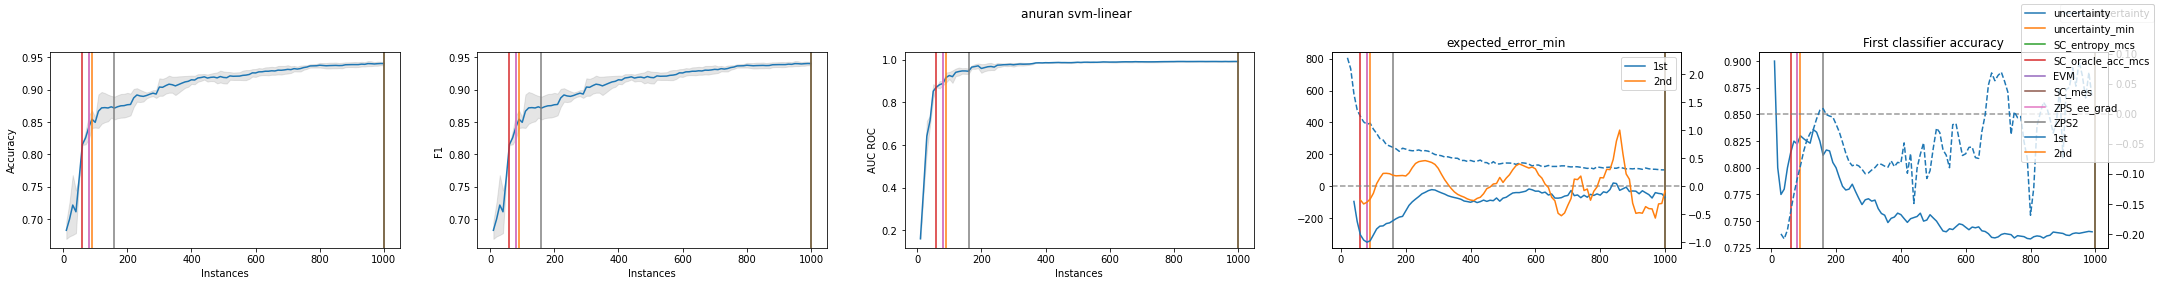

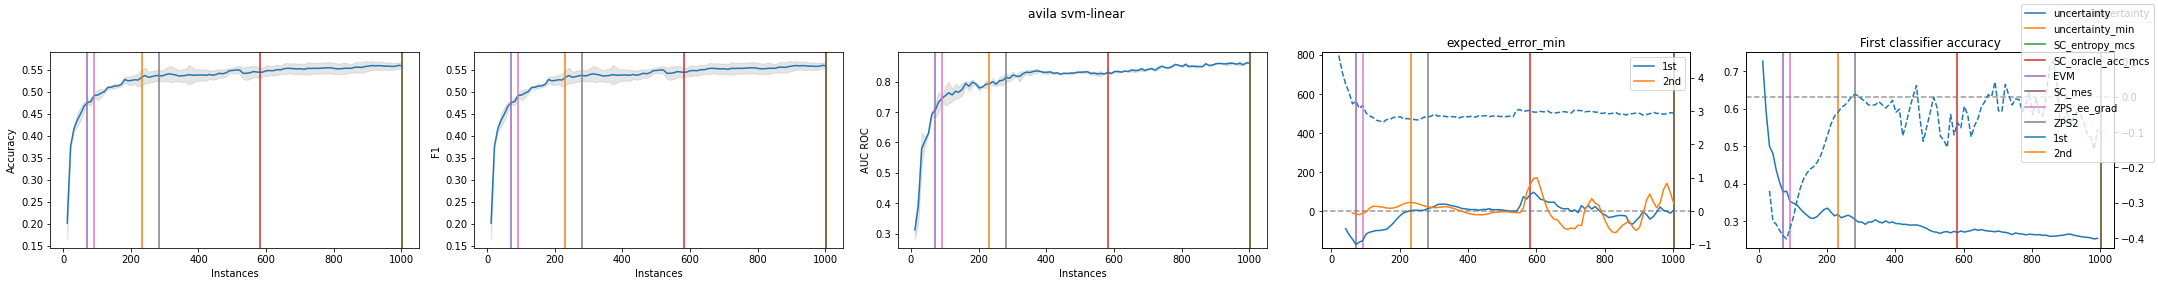

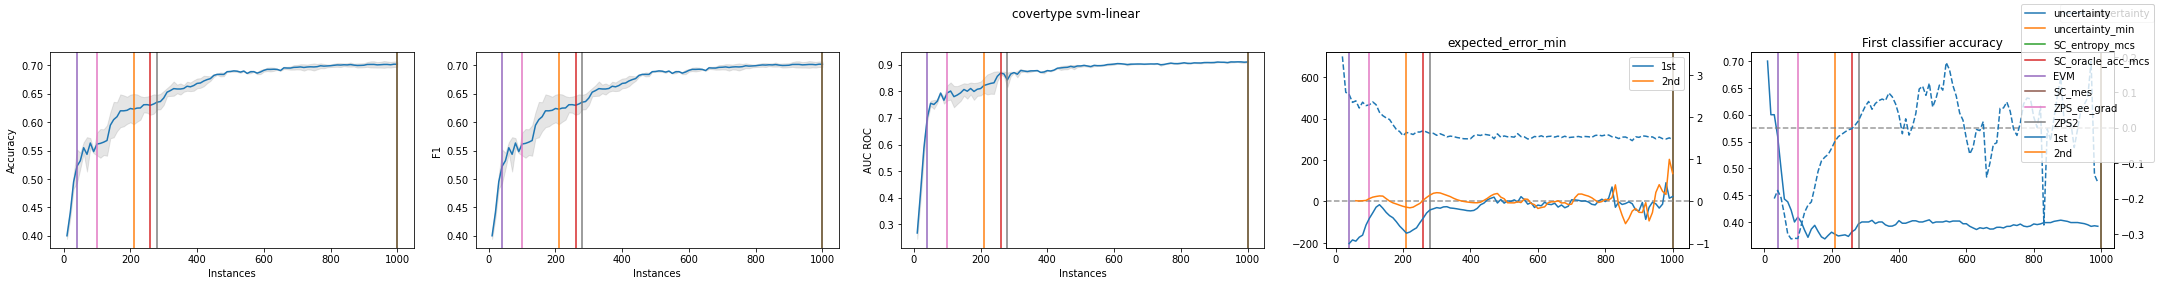

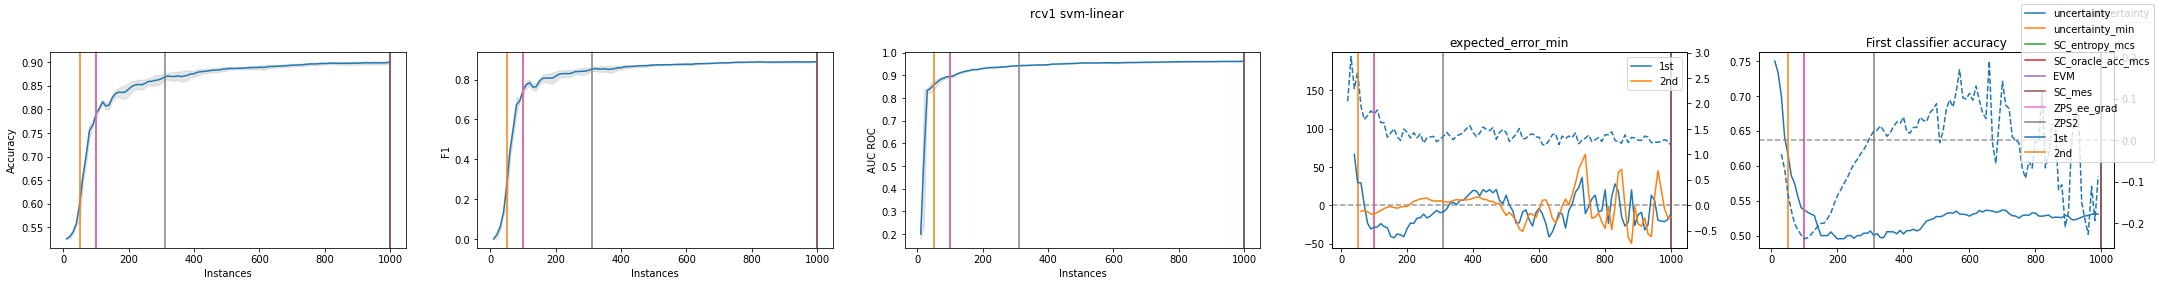

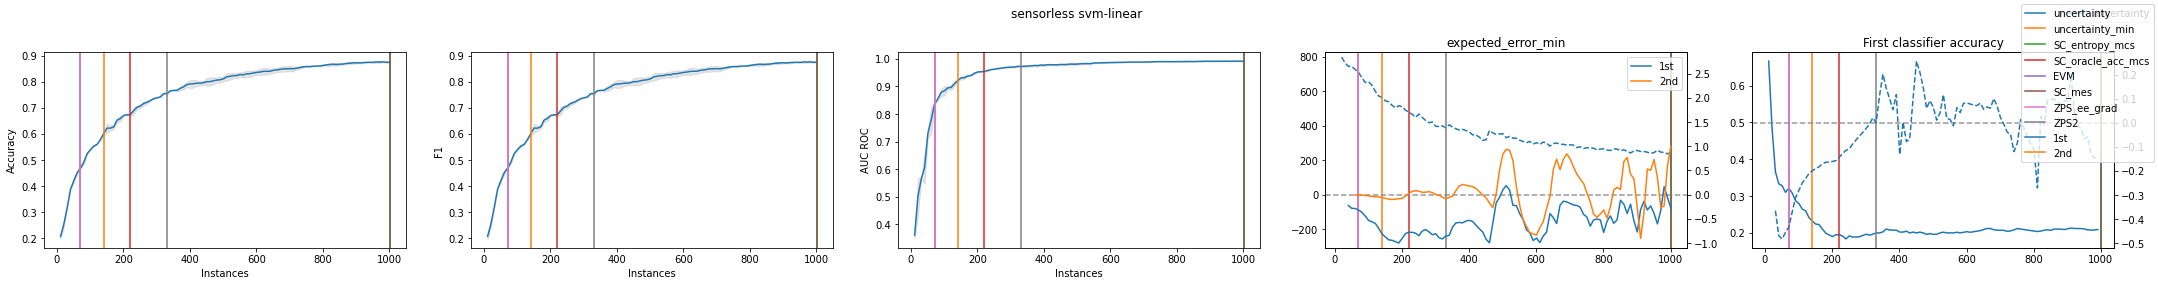

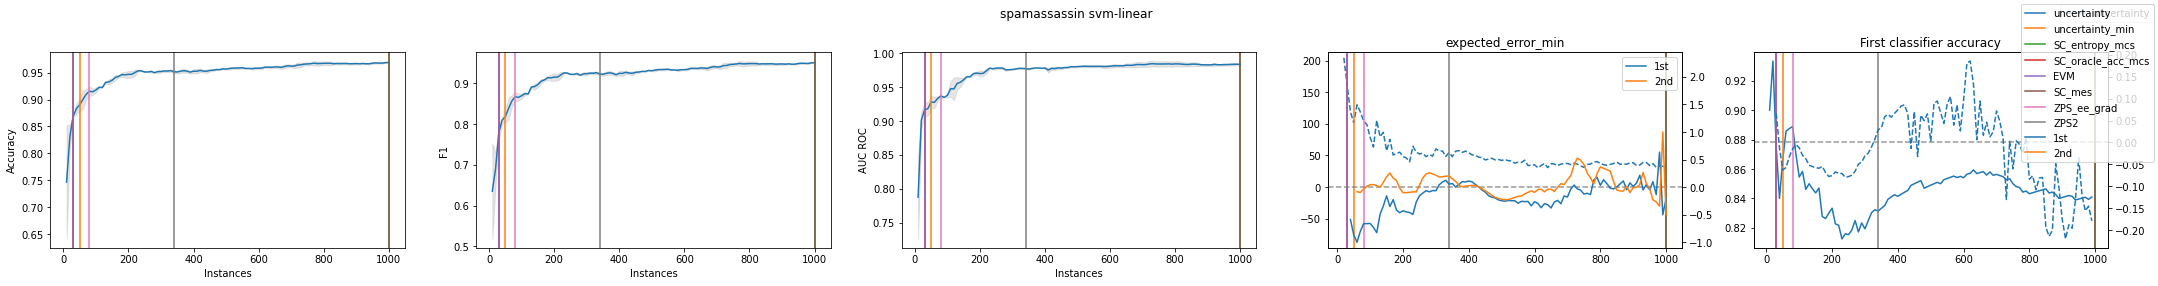

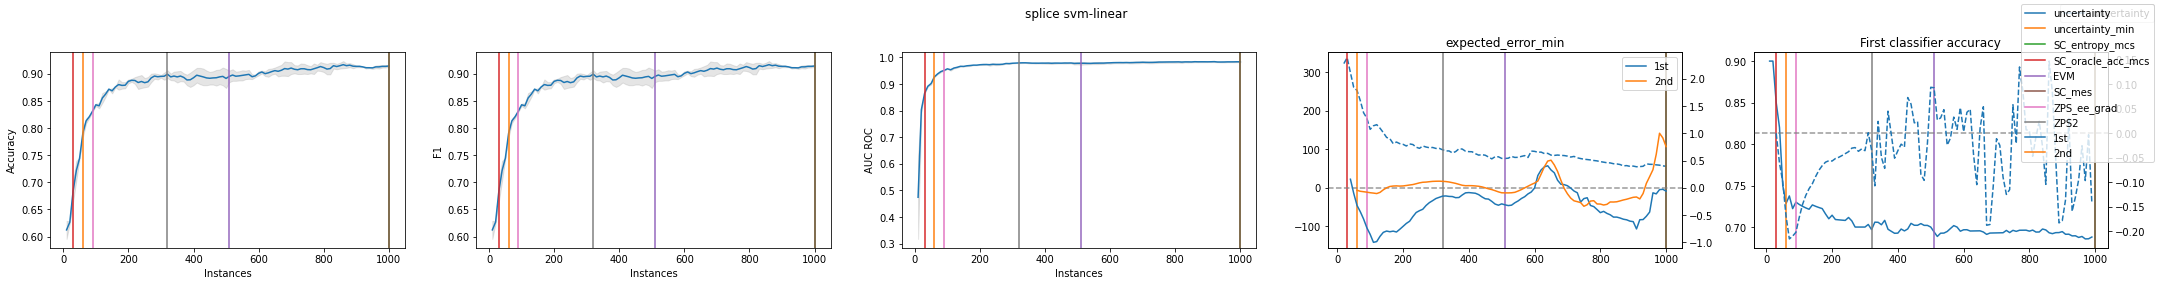

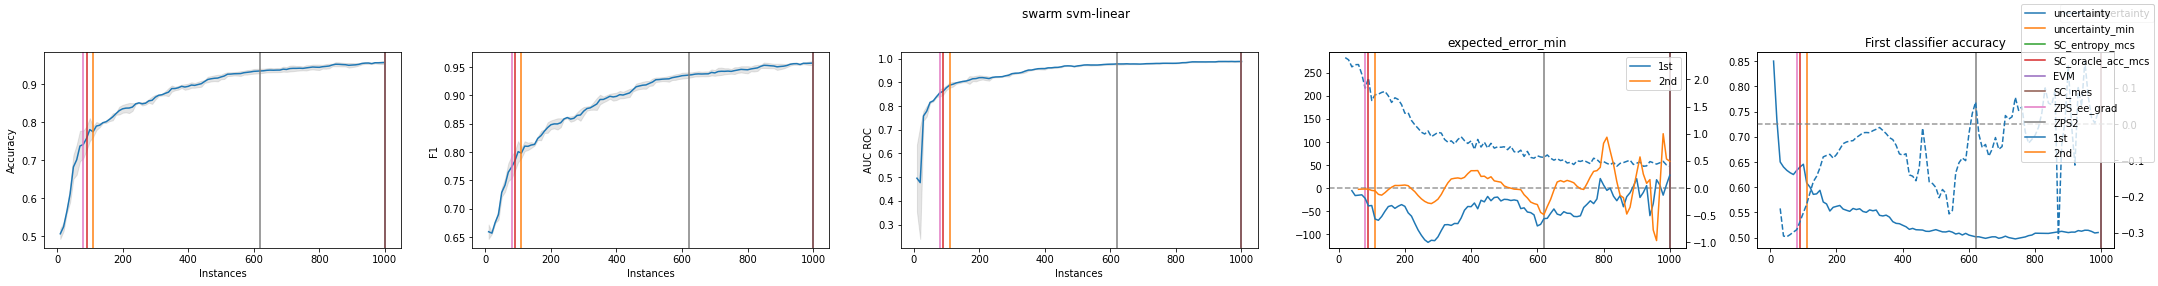

In [7]:
reload(librun)
librun.plot_stop(results_plots, classifiers, stop_conditions, stop_results, figsize=(30, 4))

In [20]:
results_plots[0][1][0]

,x,accuracy_score,f1_score,roc_auc_score,time,uncertainty_average,uncertainty_min,uncertainty_max,uncertainty_variance,uncertainty_average_selected,...,uncertainty_max_selected,uncertainty_variance_selected,entropy_max,n_support,contradictory_information,expected_error,expected_error_min,expected_error_max,expected_error_average,expected_error_variance
0,10.0,0.695942,0.695942,0.160578,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,10.0,NaN,NaN,NaN,NaN,NaN,NaN
1,20.0,0.673152,0.673152,0.379511,0.035604,0.857657,0.792888,0.890599,0.000154,0.836360,...,0.855861,0.000324,2.300862,19.0,10.000000,NaN,805.736350,864.263212,852.916785,43.519482
2,30.0,0.675375,0.675375,0.569883,0.039359,0.737980,0.559463,0.846095,0.002498,0.768535,...,0.798743,0.001083,2.273716,26.0,7.994201,NaN,737.338617,765.764855,749.282425,27.160390
3,40.0,0.678155,0.678155,0.691914,0.040503,0.586115,0.177600,0.827069,0.022310,0.694834,...,0.811140,0.017040,2.238579,33.0,8.832613,NaN,579.070843,625.857009,596.372663,51.832073
4,50.0,0.760145,0.760145,0.885966,0.041203,0.512919,0.129618,0.870891,0.035280,0.616588,...,0.756596,0.017132,2.279626,41.0,8.772930,NaN,478.624308,542.679979,502.838590,88.408004
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,960.0,0.944136,0.944136,0.991049,0.199836,0.108399,0.000053,0.771665,0.023284,0.665897,...,0.768741,0.002929,1.972328,352.0,8.972892,NaN,106.378685,117.289490,110.550174,2.905081
96,970.0,0.942746,0.942746,0.990681,0.202002,0.113146,0.000041,0.781955,0.023250,0.691073,...,0.781955,0.004358,1.979990,357.0,9.070509,NaN,105.925046,118.449402,110.435309,3.278797
97,980.0,0.943580,0.943580,0.990595,0.206340,0.105623,0.000374,0.780170,0.020275,0.635620,...,0.780170,0.010395,1.977144,361.0,8.772585,NaN,103.982566,115.631700,108.822844,3.284401
98,990.0,0.943302,0.943302,0.990962,0.206957,0.105733,0.000215,0.738218,0.021913,0.634452,...,0.738218,0.004918,1.940205,361.0,8.950428,NaN,102.280651,113.946342,107.318439,2.692132


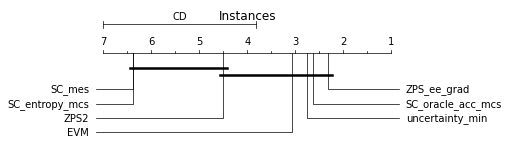

In [26]:
reload(libstop); from libstop import rank_stop_conds
rank_stop_conds(stop_results, results_plots, 'instances');

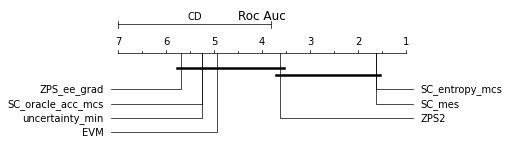

In [29]:
reload(libstop); from libstop import rank_stop_conds
rank_stop_conds(stop_results, results_plots, 'roc_auc_score');